In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib as plt
import datetime as dt

In [2]:
pip install datetime

In [3]:
df = pd.read_csv("data.csv", encoding="unicode_escape")

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
##Veriyi_Anlama

In [6]:
df["Description"].nunique()

4223

In [7]:
df["InvoiceNo"].nunique()

25900

In [8]:
df.groupby("Description").sum()["Quantity"].sort_values(ascending=False)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53847
JUMBO BAG RED RETROSPOT              47363
ASSORTED COLOUR BIRD ORNAMENT        36381
POPCORN HOLDER                       36334
PACK OF 72 RETROSPOT CAKE CASES      36039
                                     ...  
Damaged                              -7540
Printing smudges/thrown away         -9058
check                               -12030
Unsaleable, destroyed.              -15644
printing smudges/thrown away        -19200
Name: Quantity, Length: 4223, dtype: int64

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [10]:
##Nan ve negatif değerleri çıkarma

In [11]:
df.dropna(inplace=True)

In [12]:
df = df[df["Quantity"]>0]

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


In [14]:
df["InvoiceDate"].max()

'9/9/2011 9:52'

In [15]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

C:\Users\potar\AppData\Local\Temp\ipykernel_7404\3012402086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [16]:
today_date = dt.datetime(2012,1,1)

In [17]:
today_date - df["InvoiceDate"].max()

Timedelta('22 days 11:10:00')

In [18]:
##agg fonksiyonuyla rfm in yapılması

In [19]:
rfm = df.groupby("CustomerID").agg({"InvoiceDate" : lambda date: (today_date - date.max()).days , "InvoiceNo" : lambda num : len(num), "UnitPrice" : sum})

In [20]:
rfm.columns = ["Recency","Frequency","Monetary"]

In [21]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,1.04
12347.0,24,182,481.21
12348.0,97,31,178.71
12349.0,40,73,605.10
12350.0,332,17,65.30
...,...,...,...
18280.0,299,10,47.65
18281.0,202,7,39.36
18282.0,29,12,62.39


In [22]:
##apply fonksiyonuyla rfm'in yapılması

In [23]:
RecencyScore = df.groupby("CustomerID")[["InvoiceDate"]].apply(lambda date : (today_date-date.max()).dt.days)

In [24]:
FrequecnyScore = pd.DataFrame(df.groupby("CustomerID")[["InvoiceNo"]].apply(lambda num:len(num)))

In [25]:
MonetaryScore = pd.DataFrame(df.groupby("CustomerID")["UnitPrice"].apply(lambda total:sum(total)))

In [26]:
pd.concat([RecencyScore,FrequecnyScore,MonetaryScore],axis=1)

,InvoiceDate,0,UnitPrice
CustomerID,,,
12346.0,347,1,1.04
12347.0,24,182,481.21
12348.0,97,31,178.71
12349.0,40,73,605.10
12350.0,332,17,65.30
...,...,...,...
18280.0,299,10,47.65
18281.0,202,7,39.36
18282.0,29,12,62.39


In [27]:
##rfm e 1'den 5'e kadar numara verildi.

In [28]:
rfm["RecencyScore"] = pd.qcut(rfm["Recency"],5, labels=[5,4,3,2,1])

In [29]:
rfm["FrequencyScore"] = pd.qcut(rfm["Frequency"],5, labels=[1,2,3,4,5])

In [30]:
rfm["MonetaryScore"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])

In [31]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.0,347,1,1.04,1,1,1
12347.0,24,182,481.21,5,5,5
12348.0,97,31,178.71,2,3,4
12349.0,40,73,605.10,4,4,5
12350.0,332,17,65.30,1,2,2
...,...,...,...,...,...,...
18280.0,299,10,47.65,1,1,2
18281.0,202,7,39.36,1,1,1
18282.0,29,12,62.39,5,1,2


In [32]:
rfm["RFM_Score"] = rfm["RecencyScore"].astype("str")+rfm["FrequencyScore"].astype("str")+rfm["MonetaryScore"].astype("str")

In [33]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
CustomerID,,,,,,,
12346.0,347,1,1.04,1,1,1,111
12347.0,24,182,481.21,5,5,5,555
12348.0,97,31,178.71,2,3,4,234
12349.0,40,73,605.10,4,4,5,445
12350.0,332,17,65.30,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,299,10,47.65,1,1,2,112
18281.0,202,7,39.36,1,1,1,111
18282.0,29,12,62.39,5,1,2,512


In [34]:
rfm["RFM_Score"].sort_values(ascending=False)

CustomerID
15701.0    555
16744.0    555
16779.0    555
16775.0    555
14291.0    555
          ... 
13922.0    111
15204.0    111
12821.0    111
17060.0    111
12346.0    111
Name: RFM_Score, Length: 4339, dtype: object

In [35]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
CustomerID,,,,,,,
12346.0,347,1,1.04,1,1,1,111
12347.0,24,182,481.21,5,5,5,555
12348.0,97,31,178.71,2,3,4,234
12349.0,40,73,605.10,4,4,5,445
12350.0,332,17,65.30,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,299,10,47.65,1,1,2,112
18281.0,202,7,39.36,1,1,1,111
18282.0,29,12,62.39,5,1,2,512


In [36]:
rfm.groupby("RFM_Score").agg({"Recency":["mean","min","max","count"], "Frequency":["mean","min","max","count"], "Monetary":["mean","min","max","count"] })

Recency                   Frequency                   \
                 mean  min  max count        mean  min   max count   
RFM_Score                                                            
111        297.629893  202  395   281    6.359431    1    14   281   
112        305.671053  204  395    76   10.592105    4    14    76   
113        302.117647  206  394    17   10.058824    1    14    17   
114        273.333333  205  353     6    7.666667    3    13     6   
115        242.500000  204  281     2    2.500000    2     3     2   
...               ...  ...  ...   ...         ...  ...   ...   ...   
544         27.952000   22   34   125   90.120000   59   121   125   
545         27.741935   22   34    31   99.935484   60   120    31   
553         28.000000   25   32     3  150.666667  123   193     3   
554         26.690476   22   34    42  150.785714  123   208    42   
555         27.172316   22   34   354  424.129944  123  7847   354   

              Monetary                          
                  mean     min       max count  
RFM_Score                                       
111          18.552278    0.42     39.67   281  
112          55.290658   40.50     91.62    76  
113         115.367647   94.05    165.95    17  
114         260.231667  179.20    341.25     6  
115         946.975000  590.00   1303.95     2  
...                ...     ...       ...   ...  
544         259.301760  177.23    354.92   125  
545         467.912258  361.11   1027.20    31  
553         141.306667  121.59    174.50     3  
554         299.267619  220.59    358.51    42  
555        1266.572768  363.97  33332.45   354  

[99 rows x 12 columns]

In [ ]:
##RFM'a göre müşteriler segmentlere ayrıldı.

In [41]:
seg_map = {"[1-2][1-2]":"hibernating", "[1-2][3-4]":"at_risk", "[1-2]5":"can't_loose", "3[1-2]":"about_to_sleep", "33":"need_attention", "[3-4][4-5]":"loyal_customers", "[4-5]1":"new_customers", "[4-5][2-3]":"potential_loyalist", "[4-5][4-5]":"champions" }

In [42]:
seg_map

{'[1-2][1-2]': 'hibernating',
 '[1-2][3-4]': 'at_risk',
 '[1-2]5': "can't_loose",
 '3[1-2]': 'about_to_sleep',
 '33': 'need_attention',
 '[3-4][4-5]': 'loyal_customers',
 '[4-5]1': 'new_customers',
 '[4-5][2-3]': 'potential_loyalist',
 '[4-5][4-5]': 'champions'}

In [49]:
rfm["RFScore"] = rfm["RecencyScore"].astype("str") + rfm["FrequencyScore"].astype("str")

In [50]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFScore
CustomerID,,,,,,,,
12346.0,347,1,1.04,1,1,1,111,11
12347.0,24,182,481.21,5,5,5,555,55
12348.0,97,31,178.71,2,3,4,234,23
12349.0,40,73,605.10,4,4,5,445,44
12350.0,332,17,65.30,1,2,2,122,12
...,...,...,...,...,...,...,...,...
18280.0,299,10,47.65,1,1,2,112,11
18281.0,202,7,39.36,1,1,1,111,11
18282.0,29,12,62.39,5,1,2,512,51


In [52]:
rfm["segment"] = rfm["RFScore"].replace(seg_map,regex=True)

In [53]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFScore,segment
CustomerID,,,,,,,,,
12346.0,347,1,1.04,1,1,1,111,11,hibernating
12347.0,24,182,481.21,5,5,5,555,55,champions
12348.0,97,31,178.71,2,3,4,234,23,at_risk
12349.0,40,73,605.10,4,4,5,445,44,loyal_customers
12350.0,332,17,65.30,1,2,2,122,12,hibernating
...,...,...,...,...,...,...,...,...,...
18280.0,299,10,47.65,1,1,2,112,11,hibernating
18281.0,202,7,39.36,1,1,1,111,11,hibernating
18282.0,29,12,62.39,5,1,2,512,51,new_customers


In [56]:
rfm[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","sum","max","min"])

Recency                    Frequency                \
                          mean     sum  max min        mean     sum   max   
segment                                                                     
about_to_sleep       74.192547   23890   93  55   15.987578    5148    29   
at_risk             187.435852  106651  395  94   56.859402   32353   119   
can't_loose         165.226190   13879  394  94  181.666667   15260   543   
champions            27.400990   16605   34  22  289.031353  175153  7847   
hibernating         231.251397  248364  395  94   13.589385   14595    29   
loyal_customers      55.206854   45104   93  36  157.116279  128364  1204   
need_attention       73.985366   15167   93  55   41.736585    8556    58   
new_customers        39.017647    6633   54  22    7.664706    1303    14   
potential_loyalist   37.668699   18533   54  22   34.943089   17192    58   

                           Monetary                                
                    min        mean         sum       max     min  
segment                                                            
about_to_sleep        1   63.047484   20301.290   1872.05    0.39  
at_risk              30  178.624271  101637.210   1387.88   22.15  
can't_loose         122  576.786560   48450.071   3360.20  215.49  
champions            59  850.777871  515571.390  33332.45   51.02  
hibernating           1   55.763717   59890.232   2033.10    0.17  
loyal_customers      59  498.497895  407272.780  12949.99   58.53  
need_attention       30  126.872244   26008.810    318.19   32.65  
new_customers         1   29.423059    5001.920    271.50    0.00  
potential_loyalist   15  113.550632   55866.911    744.73   11.36

In [67]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFScore,segment
CustomerID,,,,,,,,,
12346.0,347,1,1.04,1,1,1,111,11,hibernating
12347.0,24,182,481.21,5,5,5,555,55,champions
12348.0,97,31,178.71,2,3,4,234,23,at_risk
12349.0,40,73,605.10,4,4,5,445,44,loyal_customers
12350.0,332,17,65.30,1,2,2,122,12,hibernating
...,...,...,...,...,...,...,...,...,...
18280.0,299,10,47.65,1,1,2,112,11,hibernating
18281.0,202,7,39.36,1,1,1,111,11,hibernating
18282.0,29,12,62.39,5,1,2,512,51,new_customers


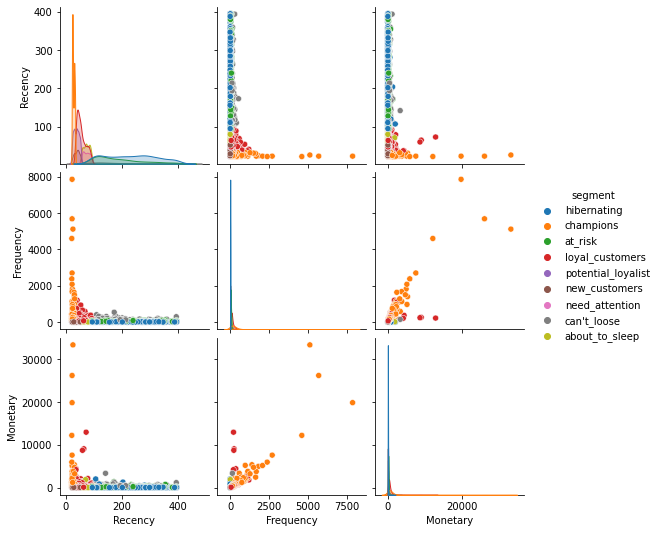

In [71]:
sns.pairplot(rfm, hue = "segment")